In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper



for z in range(1, 2): #range(1, 100) for all sample outputs given. For this case, only 1 simulation. 
    #print("Sample Output:", z)
    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/" + str(z) + ".out") as infile:
        for i in range(36):
            next(infile)
        for line in infile:
            sourcefile = infile.read()

    sourcefile_list = sourcefile.split("\n")

    y = 0
    edge_weights = []
    df = pd.DataFrame([])
    time = sourcefile_list[0][131:]

    for x in range(len(sourcefile_list)):
        if "Edge From Node" in sourcefile_list[x]:
            if time in sourcefile_list[x][131:]:
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
            else:
                column_values = pd.Series(edge_weights)
                df.insert(loc=y, column=truncate(float(time), 2), value=column_values)
                edge_weights.clear()
                time = sourcefile_list[x][131:]
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
                y+=1
    column_values = pd.Series(edge_weights)
    df.insert(loc=y, column=truncate(float(time), 2), value=column_values)

In [2]:
df

,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.89,...,1.09,1.20,1.30,1.40,1.50,1.60,1.70,1.80,1.90,2.00
0,1.303237,1.303237,1.303237,1.303237,1.303150,1.303088,1.302983,1.302771,1.302614,1.302480,...,1.302298,1.302167,1.302013,1.302040,1.301912,1.301680,1.301471,1.301346,1.301117,1.300988
1,1.683592,1.683592,1.683592,1.683546,1.683486,1.683182,1.682960,1.682712,1.682357,1.682081,...,1.681399,1.681070,1.680904,1.680740,1.680251,1.680030,1.679730,1.679512,1.679241,1.678914
2,-0.698580,-0.698580,-0.698580,-0.698580,-0.698583,-0.698589,-0.698645,-0.698731,-0.698824,-0.698879,...,-0.699028,-0.699082,-0.699206,-0.699319,-0.699353,-0.699327,-0.699361,-0.699315,-0.699377,-0.699559
3,-0.566867,-0.566867,-0.566867,-0.566867,-0.566825,-0.566925,-0.566882,-0.566890,-0.566939,-0.566978,...,-0.567075,-0.567103,-0.567131,-0.567150,-0.567198,-0.567226,-0.567295,-0.567384,-0.567432,-0.567582
4,0.744900,0.744900,0.744900,0.744900,0.744839,0.744769,0.744612,0.744455,0.744351,0.744199,...,0.744186,0.744088,0.743858,0.743741,0.743715,0.743515,0.743441,0.743202,0.743109,0.742918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.724469,0.724469,0.724469,0.724455,0.724390,0.724350,0.724237,0.724106,0.723941,0.723765,...,0.723464,0.723275,0.723053,0.722888,0.722723,0.722466,0.722166,0.722055,0.721798,0.721687
86,0.131374,0.131374,0.131374,0.131337,0.131314,0.131188,0.131203,0.131091,0.130934,0.130800,...,0.130577,0.130495,0.130398,0.130279,0.130175,0.130093,0.129996,0.129810,0.129728,0.129631
87,0.710077,0.710077,0.710077,0.710077,0.710077,0.710075,0.710016,0.709918,0.709740,0.709601,...,0.709514,0.709417,0.709211,0.709100,0.708941,0.708850,0.708691,0.708581,0.708379,0.708197
88,-0.595289,-0.595289,-0.595289,-0.595289,-0.595266,-0.595273,-0.595341,-0.595438,-0.595494,-0.595551,...,-0.595583,-0.595619,-0.595716,-0.595772,-0.595788,-0.595915,-0.596001,-0.596037,-0.596114,-0.596210


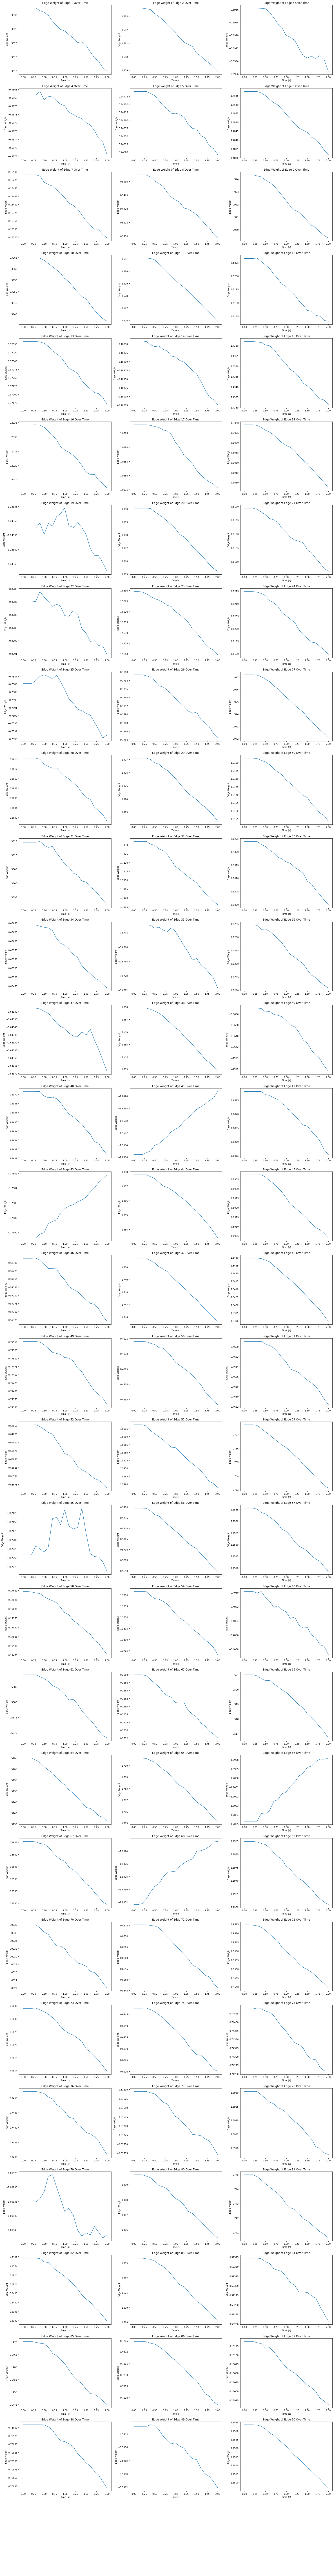

In [33]:
import scipy.stats

#Transpose Dataframe to create graph
df2 = df.T
df2.insert(loc=0, column="time", value=df2.index)

x = np.array(df2[df2.columns[0]])
upper_limit = len(df2.columns)
slope = []
intercept = []

for z in range(1, 2):
    y = np.array(df2[df2.columns[z]])
    #plt.plot(x, y)
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b)

ncols = 3
nrows = int(np.ceil(len(df2.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 210))

counter = 1
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df2.columns):
            ax.get_yaxis().get_major_formatter().set_useOffset(False)
            ax.plot(np.array(df2[df2.columns[0]]), np.array(df2[df2.columns[counter]]), label = "Edge " + str(counter))
            #ax.legend(loc='upper left')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Edge Weight')
            ax.set_title("Edge Weight of Edge " + str(counter) + " Over Time")
            #leg = ax.legend(loc='upper left')
            #leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper



for z in range(1, 2): #range(1, 100) for all sample outputs given. For this case, only 1 simulation. 
    #print("Sample Output:", z)
    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/100_1.out") as infile:
        for i in range(36):
            next(infile)
        for line in infile:
            sourcefile = infile.read()

    sourcefile_list = sourcefile.split("\n")

    y = 0
    edge_weights = []
    df = pd.DataFrame([])
    time = sourcefile_list[0][131:]

    for x in range(len(sourcefile_list)):
        if "Edge From Node" in sourcefile_list[x]:
            if time in sourcefile_list[x][131:]:
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
            else:
                column_values = pd.Series(edge_weights)
                df.insert(loc=y, column=truncate(float(time), 2), value=column_values)
                edge_weights.clear()
                time = sourcefile_list[x][131:]
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
                y+=1
    column_values = pd.Series(edge_weights)
    df.insert(loc=y, column=truncate(float(time), 2), value=column_values)
    

In [ ]:
import scipy.stats

#Transpose Dataframe to create graph
df2 = df.T
df2.insert(loc=0, column="time", value=df2.index)

x = np.array(df2[df2.columns[0]])

ncols = 3
nrows = int(np.ceil(len(df2.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 210))

counter = 1
for i in range(10):
    for j in range(10):
        ax = axes[i][j]
        if counter < len(df2.columns):
            ax.get_yaxis().get_major_formatter().set_useOffset(False)
            ax.plot(np.array(df2[df2.columns[0]]), np.array(df2[df2.columns[counter]]), label = "Edge " + str(counter))
            #ax.legend(loc='upper left')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Edge Weight')
            ax.set_title("Edge Weight of Edge " + str(counter) + " Over Time")
            #leg = ax.legend(loc='upper left')
            #leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

# 100 Recurrent Node Network

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper



for z in range(0, 1):
    #print("Sample Output:", z)
    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/Sample_Output_1/" + str(z) + ".out") as infile:
        for i in range(36):
            next(infile)
        for line in infile:
            sourcefile = infile.read()

    sourcefile_list = sourcefile.split("\n")

    y = 0
    edge_weights = []
    df = pd.DataFrame([])
    time = sourcefile_list[0][131:]

    for x in range(len(sourcefile_list)):
        if "Edge From Node" in sourcefile_list[x]:
            if time in sourcefile_list[x][131:]:
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
            else:
                column_values = pd.Series(edge_weights)
                df.insert(loc=y, column=truncate(float(time), 2), value=column_values)
                edge_weights.clear()
                time = sourcefile_list[x][131:]
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
                y+=1
    column_values = pd.Series(edge_weights)
    df.insert(loc=y, column=truncate(float(time), 2), value=column_values)
    

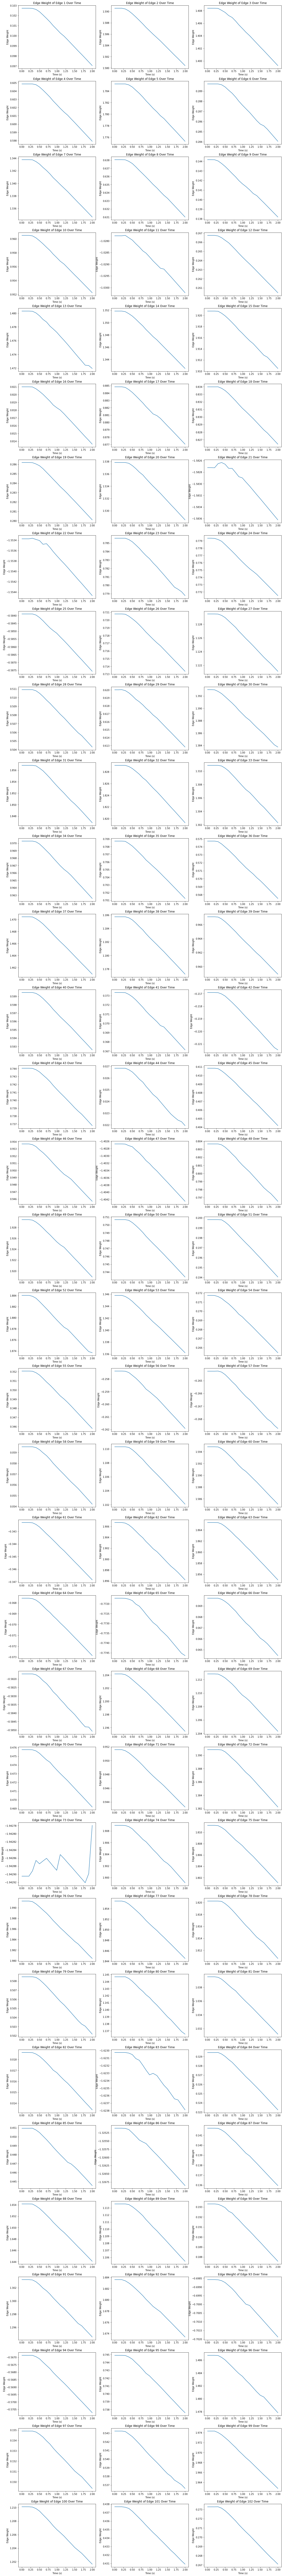

In [30]:
import scipy.stats

#Transpose Dataframe to create graph
df2 = df.T
df2.insert(loc=0, column="time", value=df2.index)

x = np.array(df2[df2.columns[0]])
upper_limit = len(df2.columns)
slope = []
intercept = []

for z in range(1, 2):
    y = np.array(df2[df2.columns[z]])
    #plt.plot(x, y)
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b)
    
ncols = 3
nrows = int(np.ceil(100 / (1.0*ncols))) #CHANGE 100 to diff number, also change figsize y
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 200))
counter = 1
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df2.columns):
            ax.get_yaxis().get_major_formatter().set_useOffset(False)
            ax.plot(np.array(df2[df2.columns[0]]), np.array(df2[df2.columns[counter]]), label = "Edge " + str(counter))
            #ax.legend(loc='upper left')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Edge Weight')
            ax.set_title("Edge Weight of Edge " + str(counter) + " Over Time")
            #leg = ax.legend(loc='upper left')
            #leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter+=1
plt.show()